In [58]:
import pandas as pd

In [59]:
# df = pd.read_csv("C:/Users/caleb/Documents/tmp/ssa/powerQueryDiscordData.csv",encoding = "ISO-8859-1")
df = pd.read_csv("./aave_5k.csv")

In [60]:
df.head()

,id,author,title,body,created,url
0,rt4973,Benny_Brave,This week on Dapps #57 of @thedapplist there a...,NaN,2022-01-01 05:54:57,https://i.redd.it/pohewsve9y881.jpg
1,rszt1u,HODL0,"Aave expands to StarkNet, Gutter City in The S...",NaN,2022-01-01 02:14:02,https://i.redd.it/zu2auisz5x881.png
2,rszp0e,Tahirasiddiqui,This week in Dapps - Ep.57 is here! 🎉 Aave exp...,NaN,2022-01-01 02:08:35,https://i.redd.it/2u1u3bs05x881.jpg
3,rsx2ii,seeldoger47,"[H] Cryto (ADA, ALGO, ATOM, AAVE, BAL, BAND, B...","#I don't take the following payments: Cashapp,...",2022-01-01 00:06:40,https://www.reddit.com/r/Cash4Cash/comments/rs...
4,rswglb,n0lefin,What’s the deal with AAVE?,[removed],2021-12-31 23:37:39,https://www.reddit.com/r/CryptoCurrency/commen...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       5000 non-null   object
 1   author   5000 non-null   object
 2   title    5000 non-null   object
 3   body     2004 non-null   object
 4   created  5000 non-null   object
 5   url      5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB


In [62]:
df['date'] = df['created'].apply(lambda x: x.split(' ')[0])

In [63]:
#filling na with forward fill. 
df = df.fillna(method='ffill')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       5000 non-null   object
 1   author   5000 non-null   object
 2   title    5000 non-null   object
 3   body     4997 non-null   object
 4   created  5000 non-null   object
 5   url      5000 non-null   object
 6   date     5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


In [65]:
# Preparing Text Data for Sentimental Analysis

import numpy as np
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')

def clean_content(contentInput):
    if type(contentInput) == np.float:
        return ""
    contentInput = contentInput.lower()
    contentInput = re.sub("'", "", contentInput) # to avoid removing contractions in english
    contentInput = re.sub("@[A-Za-z0-9_]+","", contentInput)
    contentInput = re.sub("#[A-Za-z0-9_]+","", contentInput)
    contentInput = re.sub(r'http\S+', '', contentInput)
    contentInput = re.sub('[()!?]', ' ', contentInput)
    contentInput = re.sub('\[.*?\]',' ', contentInput)
    contentInput = re.sub("[^a-z0-9]"," ", contentInput)
    contentInput = contentInput.strip()
    contentInput = contentInput.split()
    contentInput = [w for w in contentInput if not w in stop]
    contentInput = " ".join(word for word in contentInput)
    return contentInput

In [66]:
# df['date'].unique()
df['year_month'] = df['date'].apply(lambda x: x[0:x.rfind('-')])
list(df['year_month'].unique())

['2022-01',
 '2021-12',
 '2021-11',
 '2021-10',
 '2021-09',
 '2021-08',
 '2021-07',
 '2021-06',
 '2021-05']

In [67]:
#spliting data into months as for time series sentimental analysis
#Getting start and end date of data

# monthList = pd.date_range('2021-01-01','2022-02-01', 
#               freq='MS').strftime("%m/%Y").tolist()

monthList = list(df['year_month'].unique())
monthList.reverse()

#creating blank dict for later

timeSplitData={}
timeSplitDataSentiment = {}

for month in monthList: 
    timeSplitData[month] = []
    timeSplitDataSentiment[month] = []    


In [68]:
timeSplitData

{'2021-05': [],
 '2021-06': [],
 '2021-07': [],
 '2021-08': [],
 '2021-09': [],
 '2021-10': [],
 '2021-11': [],
 '2021-12': [],
 '2022-01': []}

In [69]:
for row in df.iterrows():
    #extracting month data from row

    # dateData = row[1]['date']
    # tmp = dateData.find('/') 

    # monthData = dateData[tmp+1:] #removing day e.g '12/'
    # if len(monthData) == 6:
    #     monthData = "0"+monthData
    
    # if monthData in timeSplitData: # check if data is in range of date we want to analyse

    monthData = row[1]['year_month']
    content = row[1]['body']
    #cleaning Data
    cleaned = clean_content(content)
    #Storing into time split dict
    timeSplitData[monthData].append(cleaned)


<ipython-input-65-cedc3de0ebca>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(contentInput) == np.float:


In [70]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lamchingrou/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [71]:
# ## VADER testing and understanding

# testText = "really painful see sushi chart"
# negativeTest = sid.polarity_scores(testText)

# testText = "market doing well go up"
# positiveTest = sid.polarity_scores(testText)
# ## compound can be use to net the sentiment.. negative mean bear

# print(negativeTest)
# print(positiveTest)

In [72]:
## Geting Sentiment Score using VANDER's sentiment model
for month in timeSplitData:
    for content in timeSplitData[month]:
        output = sid.polarity_scores(content)
        timeSplitDataSentiment[month].append(output)


In [73]:
## Calculating Net Weighted Sentiment Score
timeSplitDataNetScore = {}
for month in monthList:
    timeSplitDataNetScore[month] = 0 
    
for month in timeSplitDataSentiment:
    for output in timeSplitDataSentiment[month]:
        compound = output['compound']
        compound = compound / len(timeSplitDataSentiment[month])
        timeSplitDataNetScore[month] +=compound


In [74]:
timeSplitDataNetScore

{'2021-05': 0.15250797773654912,
 '2021-06': 0.2219583941605843,
 '2021-07': 0.13246645898234702,
 '2021-08': 0.17900127659574488,
 '2021-09': 0.2584282608695653,
 '2021-10': 0.34140615384615414,
 '2021-11': 0.245884584178499,
 '2021-12': 0.17028578088578095,
 '2022-01': 0.100475}

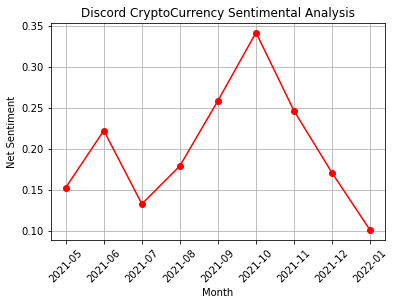

In [75]:
import matplotlib.pyplot as plt

xAxis = []
yAxis = []

for date in timeSplitDataNetScore:
    xAxis.append(date)
    yAxis.append(timeSplitDataNetScore[date])

plt.plot(xAxis,yAxis, color='red', marker='o')
plt.title('Discord CryptoCurrency Sentimental Analysis')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Net Sentiment')
plt.grid(True)
plt.show()